In [1]:
import pandas as pd
import numpy as np
import requests
from urllib.parse import urljoin
import bs4
from sklearn.metrics import pairwise_distances as dist
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

from IPython.display import Image, display, HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black; font-family:Roboto; font-weight:bold">TITLE</h1></center>
</div> 


<p style="text-align:center;"><img src="title_pic.png" alt="Title Picture" width="1000" height="1000"></p>

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black;font-family:Roboto; font-weight:bold">ABSTRACT</h1></center>
</div>


This study pioneers the application of advanced data science methodologies to redefine the potential success trajectory of Filipino artists, with a specific focus on the acclaimed artist Karencitta. Leveraging the Spotify API's song dataset, the study employs information retrieval techniques to identify a set of songs closely aligned with Karencitta's chart-topping hit, "Cebuana." Through the utilization of three similarity measures—namely, the $L_{1}$ norm, $L_{2}$ norm, and cosine distance—the study reveals a promising collaboration prospect between Karencitta and O Side Mafia. This Manila-based trio, known for crafting angsty and trap metal compositions, resonates with the societal frustration and street culture prevalent in their neighborhood, particularly during the challenging times of the pandemic. Future research directions are outlined to explore additional similarity measures, extend the temporal analysis, and delve into international collaborations, presenting a comprehensive framework for the ongoing exploration of musical partnerships and the continued advancement of data-driven insights in the realm of music.

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black;font-family:Roboto; font-weight:bold">INTRODUCTION</h1></center>
</div>


<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h2 style="color: black;font-family:Roboto; font-weight:bold">Background</h2></center>
</div>


### Spotify
Spotify, founded in 2006 by Daniel Ek and Martin Lorentzon in Stockholm, Sweden, has revolutionized the way we experience music. It's a leading digital music service that gives users access to millions of songs, podcasts, and videos from artists all over the world. Spotify operates on a freemium model: basic features are free with advertisements and limited control, while additional features, such as improved streaming quality and music downloads, are offered via paid subscriptions.

Spotify's impact on the music industry is profound. It has been a key player in the shift from physical and download-based music consumption to streaming, helping combat piracy and providing a platform for artists to monetize their work. With its global reach, Spotify has become a crucial platform for artists to gain international exposure and for listeners to explore a diverse range of music genres and artists from around the world.

### Karencitta

Karen Ann “Karencitta” Cabrera, an award-winning recording artist and songwriter from Cebu City, Philippines, has made a significant impact in the music industry with her unique blend of electronic dance and pop music. Her journey to stardom began in earnest in 2017 with the release of her Sinulog Electronic Dance Pop hit ‘Cebuana’. This track not only topped Spotify's Most Viral Music chart in 2017 but also demonstrated her widespread appeal, as evidenced by the music video garnering over 1 million views within the first 24 hours and amassing a total of 26 million views to date. You can see more about her musical data from Spotify in Figure 1. 

Her other popular tracks, such as ‘Bambambam’ with 19 million views and ‘No Apology’ with 6.1 million views on YouTube, further cement her status as a hitmaker. Karencitta's talent and appeal were recognized at the Cebu Siloy Music Awards 2018, where ‘Cebuana’ won Best Song of The Year and Best Female Vocal Performance. Additionally, she received the Best Regional Recording award at the Awit Awards in the same year. But the best thing about her tracks is she always integrate a little bit of Cebuano lyrics in there. 

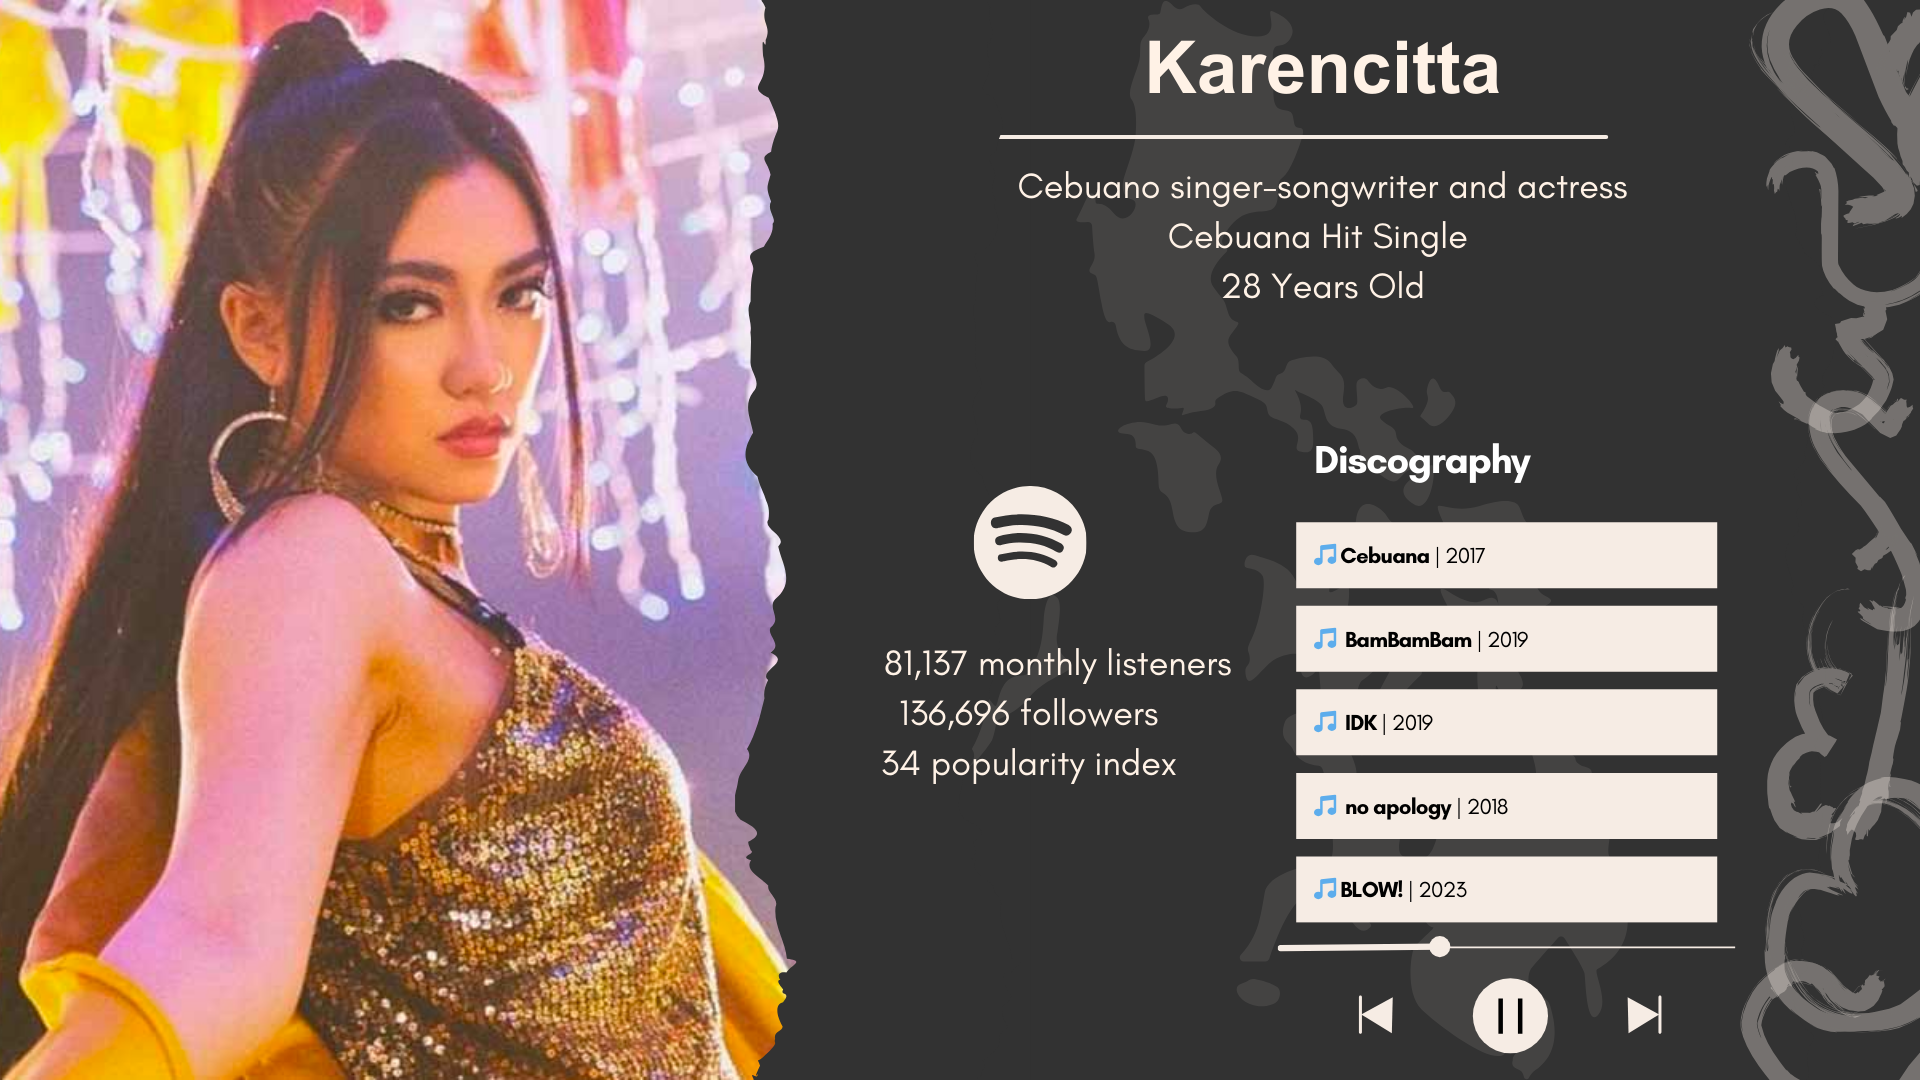
 <center><b>Figure 1</b>. Karencitta's Spotify Profile</center>

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h2 style="color: black;">Problem Statement</h2></center>
</div>


The scenario for this study is an artist approaches a record label company to produce her next song. The company, being data-driven, wants to use Spotify data to look for ways on how to make her next song successful. 
### Objectives  
The specific objectives are as follows:  
1. **Data Collection:** Retrieve and compile a comprehensive dataset of from the Spotify webplayer and Spotify API. 
2. **Data Processing:** Clean and transform the data into a format that is readily available for analysis.
3. **Exploratory Data Analysis:** Explore the features of the determined songs of the client artist.
4. **Similarity Analysis:** Based on client's songs, determine the most similar tracks using distance measures.
5. **Model Evaluation:** Check the performance of similarity analysis using precision and recall. 
6. **Artist Identification:** Determine other artists that could collaborate with her.
7. **Results and Discussion:** Discuss the the results and what could be improved. 

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h2 style="color: black;">Data Sources and Description</h2></center>
</div>


### Webscraping the Spotify Web Player 
This project is concerned with data from Spotify, its webplayer and its own API. <br>

From the webplayer, as seen on Figure 2, the team needs to web scrape the several artists' name appearing on the artist search query with the keyword 'filipino'. This proved to be challenging because the teams wanted artists from the Philippines but Spotify didn't have anything on its API that would give us artists based on their nationality. However, the team still found a way to completely scrape this page with the help of the looking at network activities and looking for the right API call (See data_collection.ipynb). 

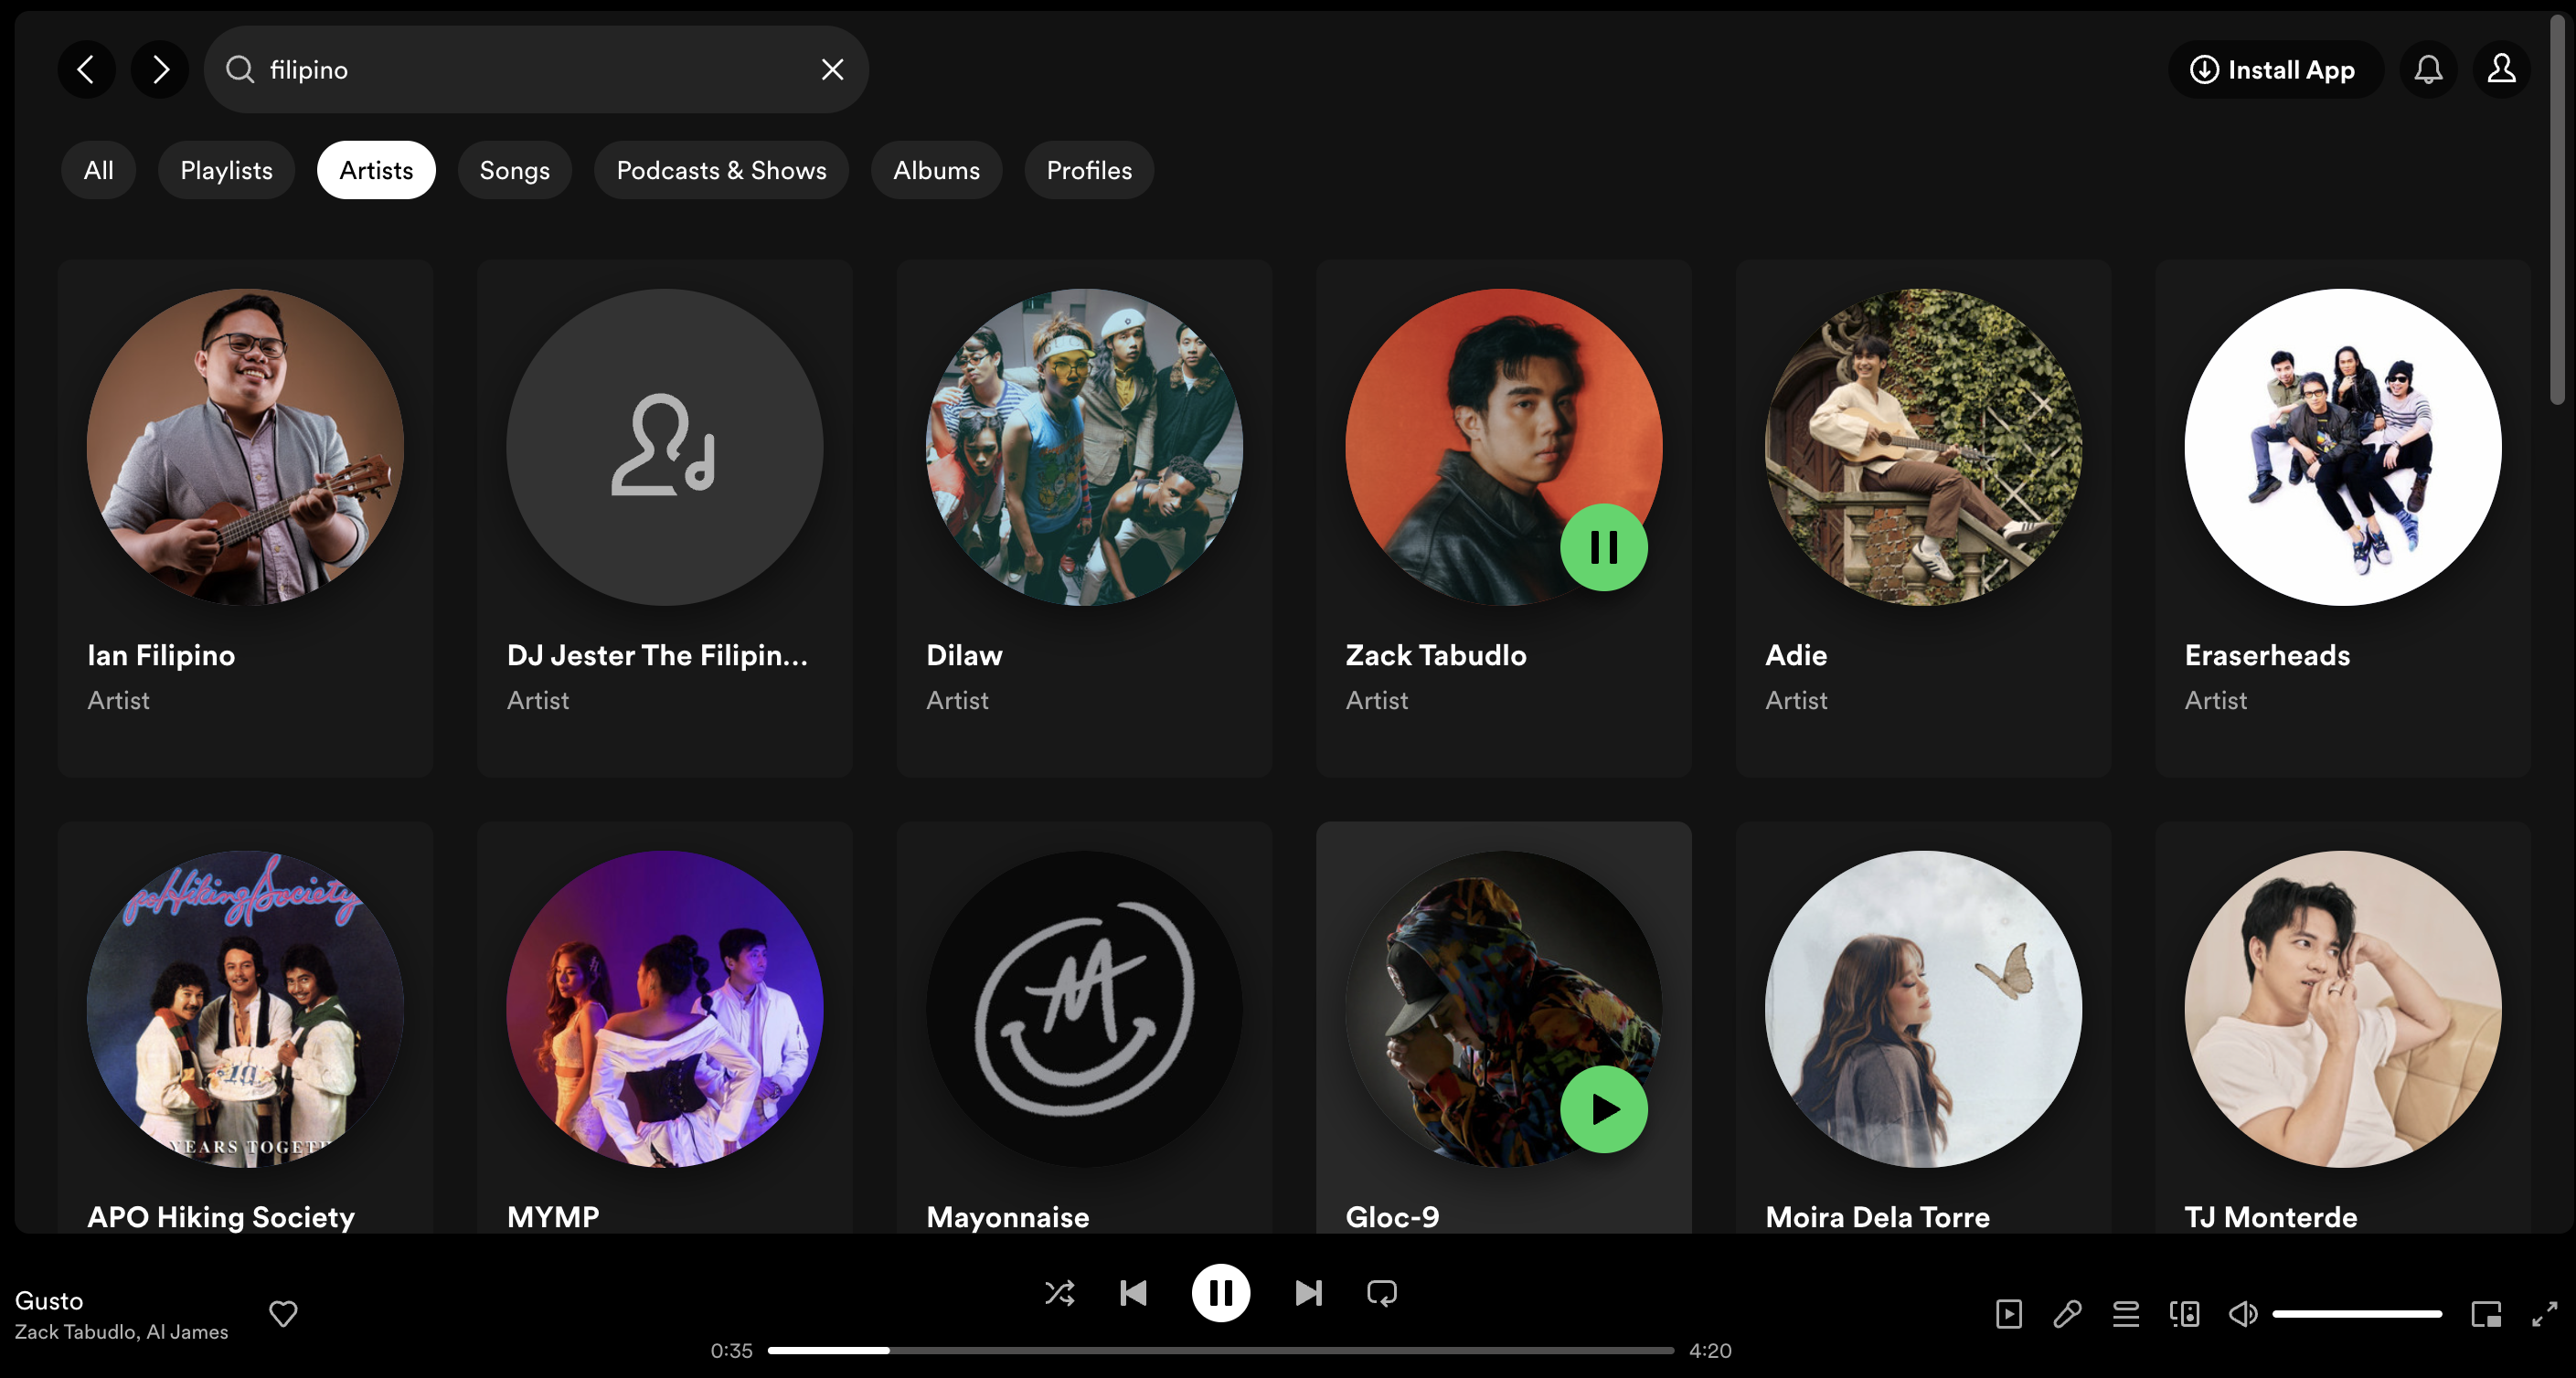

 <center><b>Figure 2</b>. Spotify Web Player for searching Filipino artists</center> 

### Utilizing the Spotify API
The <a href="https://developer.spotify.com/documentation/web-api" target="_blank">Spotify API</a>, officially known as the Spotify Web API, is a powerful tool that allows developers to access a wide range of Spotify's music data and functionalities. It provides programmatic access to information about artists, albums, tracks, and playlists on the Spotify platform. Here are some key features and capabilities of the Spotify API:

Access to Spotify Catalog: The API allows you to search and retrieve metadata about music artists, albums, and tracks available on Spotify. This includes details like song titles, artist names, album information, and track duration.

Playlist Management: The API enables the creation, modification, and retrieval of user's playlists, including adding or removing tracks.

Music Analysis: It provides detailed audio analysis for tracks in Spotify's catalog, such as tempo, key, energy, danceability, and more, which can be invaluable for music-related data science projects. See Table 1 for their complete description. 


The Spotify API responses are returned in JSON format, making it accessible and easy to use for developers familiar with web technologies. It's a powerful tool for anyone looking to build applications or services that interact with the rich world of music and user data on Spotify. Table 1 shows the audio features analyzed in this study (Spotify, n.d.).



| <center>Attribute</center> | <center>Type</center> | <center>Description</center> |
|:-----------------------|:---------------------|:--------------------------------------------------------------------------------|
| acousticness     | float        | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability     | float        | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| duration_ms      | integer      | The duration of the track in milliseconds. |
| energy           | float        | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.  |
| instrumentalness | float        | The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.|
| key              | integer      | The converted mana cost of the card. |
| liveness         | float        | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. | 
| loudness         | float        | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. |
| mode             | integer      | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| speechiness      | float        | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. |
| tempo            | float        | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time_signature   | integer      | An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". |
| valence          | float        | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |

<center><b>Table 1. </b> Spotify Audio Features</center>

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h2 style="color: black;">Methodology</h2></center>
</div>


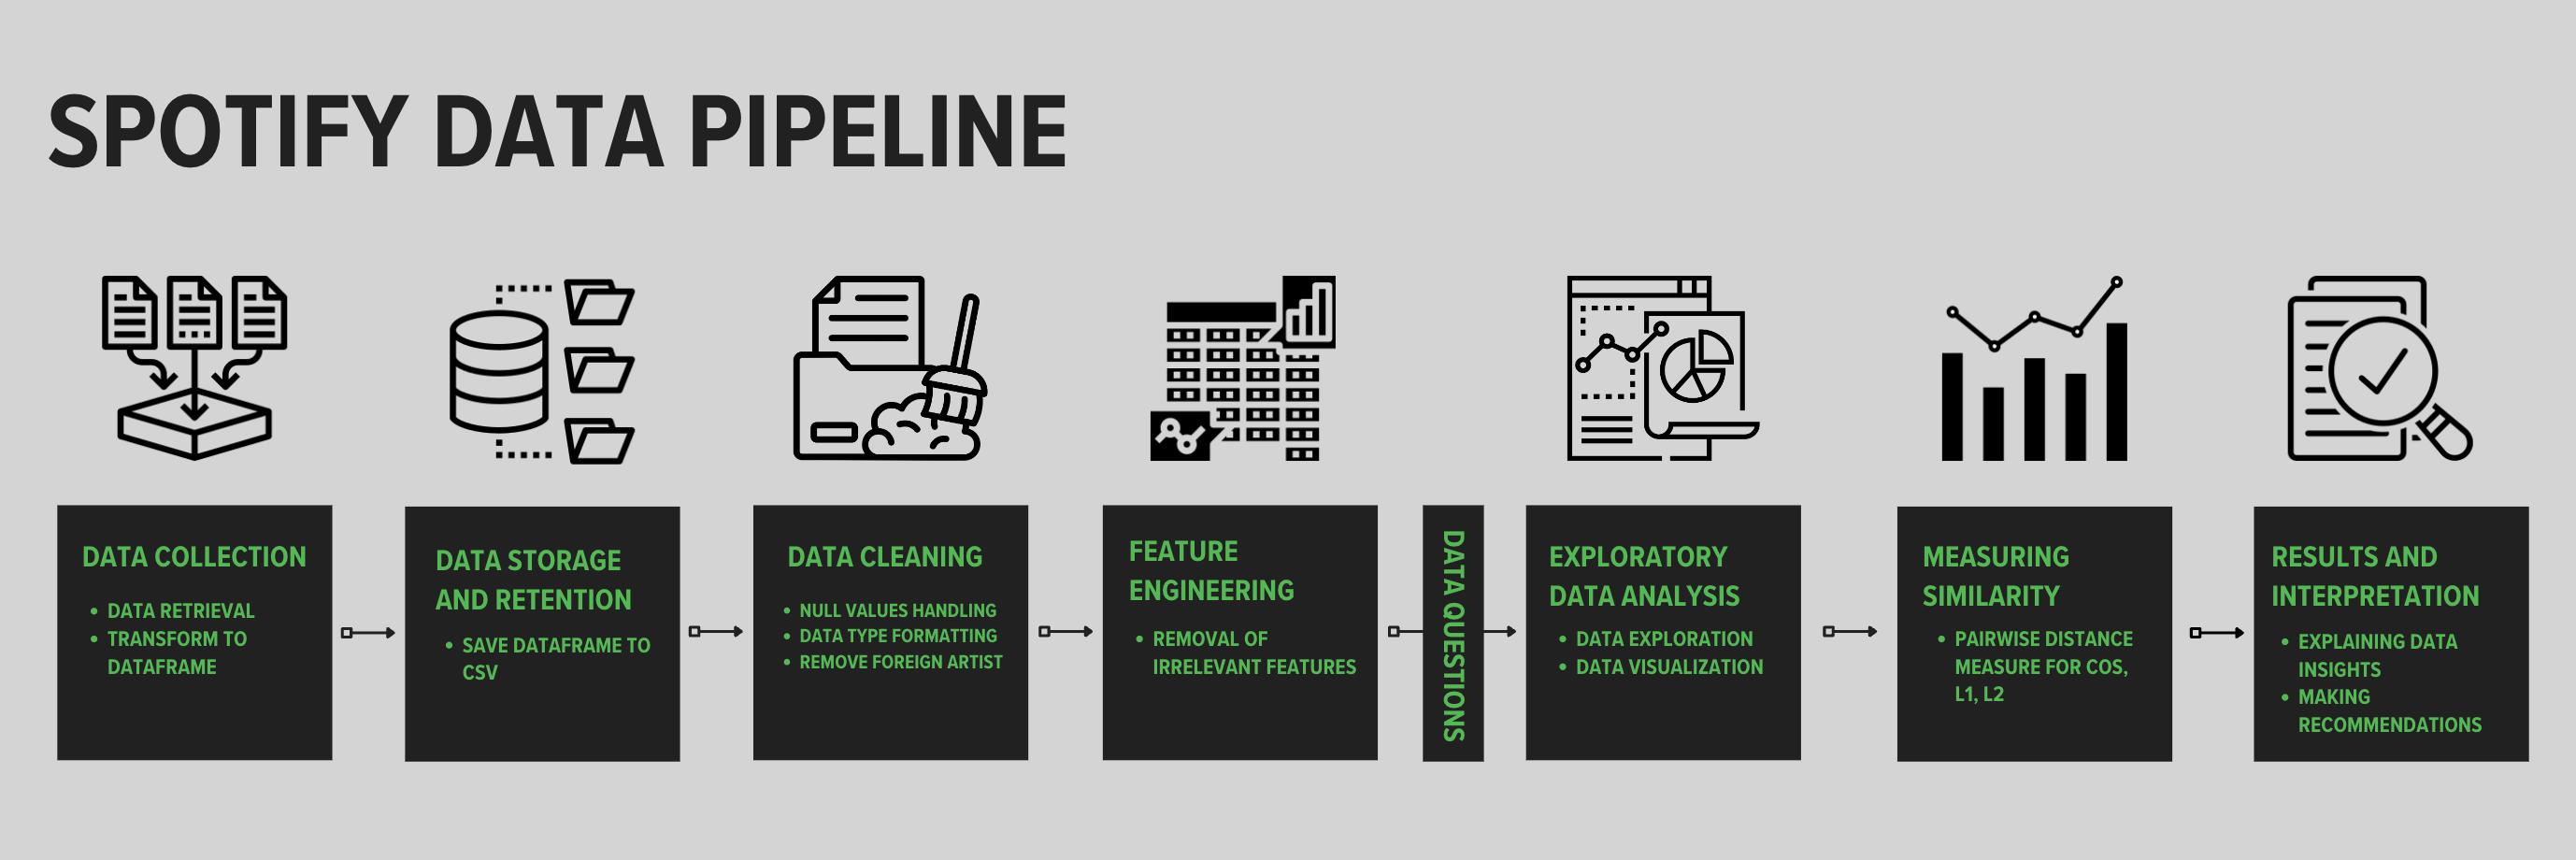
<center><b>Figure 3.</b> Spotify Data Pipeline</center>



The project started with collecting the data and storing it in a csv file. All data to be used in the analysis is then extracted from the said csv. Next, the team performed data cleaning on the resulting dataframe, making sure null values are handled properly and that all data are in the appropriate data type. Next, the team also manually removed foreign artists from the data (JVKE, Philippine, Borben, Ãlvaro De Luna). Other irrelevant features such as key and mode were not included in loading the features for the dataframe of tracks. (See complete pipeline in Figure 3)

After processing the data, the next step was to explore the data by asking questions. This initial findings will serve as the guide in the next analysis.  
1.  What is the distribution of the audio features of songs by artists more popular than Karencitta?
2.  What is the correlation of each audio feature? 
3.  Which artists have the most followers? 

After doing EDA, the next step was to do similarity analysis. The team wanted to compare Karencitta's top hit song Cebuana and measure its similarity distance (L1, L2, and Cos) to each track. In this case, the team wanted to recommend artist collaborations based on how similar their track is. Then, the team have  compare each measure's performance and explaining why that measure was selected. Based on the results, artists from the 'filipino' pool will be recommended as Karencitta's featured artist for her next hit single. 

---

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black; font-family:Roboto; font-weight:bold">DATA COLLECTION & PREPROCESSING</h1></center>
</div>


For the data collection, it was done in a separate notebook (See data_collection.ipynb), both for webscraping and API. Here are the steps involved in it.  

**Step 1.** Creating an Access Token.  
**Step 2.** Retrieve a Pool of Filipino Artist ID's.  
It involves using parameters for the API call from the dynamic web player site specific for the user, like user agents, client and bearer tokens.  
**STEP 3:** Get a list of tracks with audio features using Artist's ID.  
First, get the track_ids of the top tracks of the artists.  
Second, for each track, get their audio features.  
**STEP 4.** Write to CSV for use in the Main Report Notebook  
**STEP 5.** Retrieve information on each artist (followers and popularity)  
The whole data collection pipeline is visualized in a flowchart in Figure 4. 
---



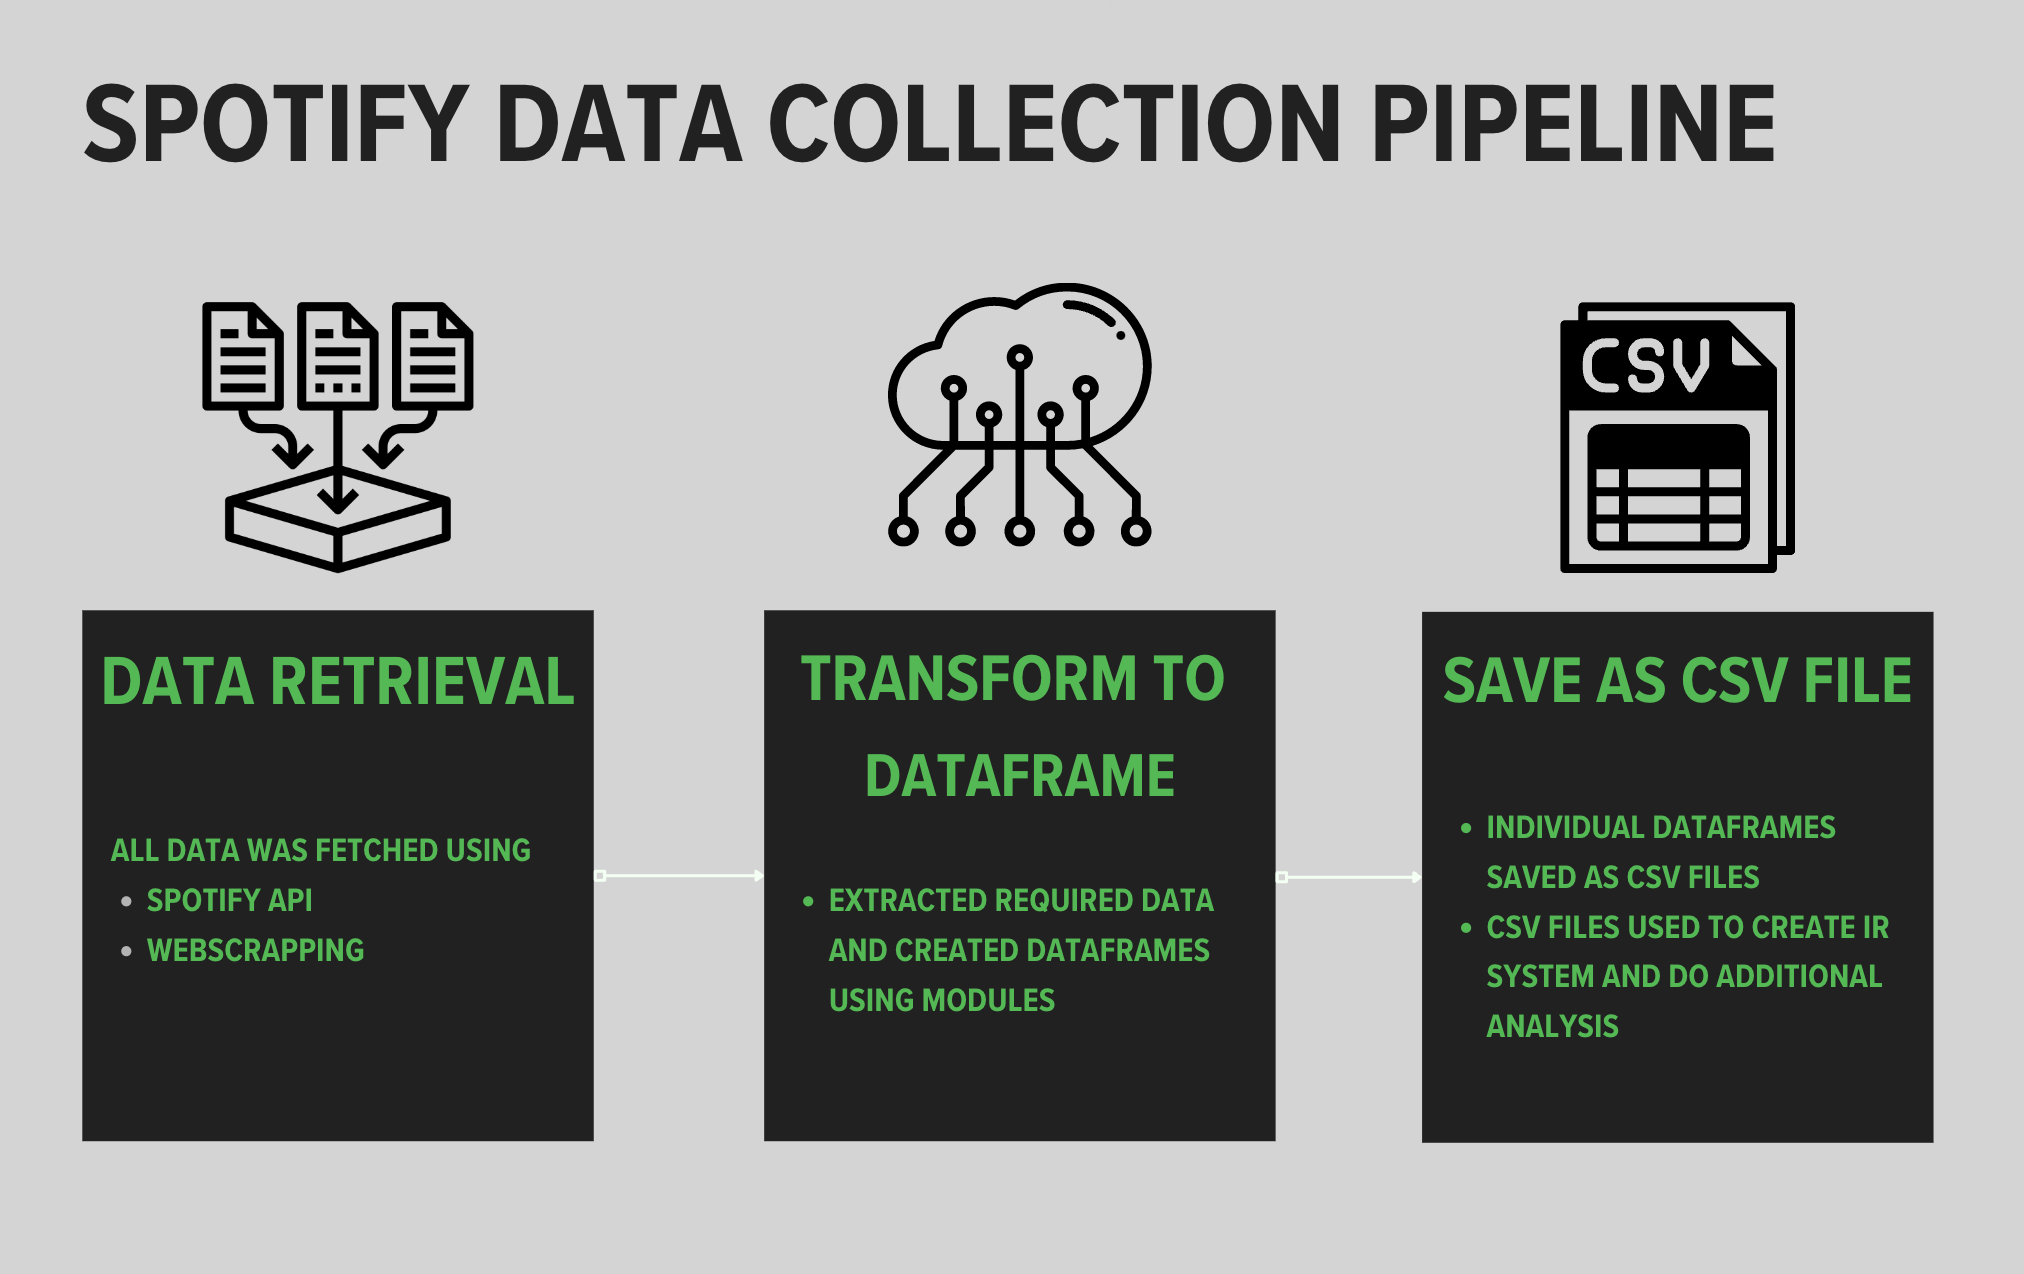
<center><b>Figure 4.</b> Data Collection Pipeline (Webscraping and API) </center>

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black; font-family:Roboto; font-weight:bold">EXPLORATORY DATA ANALYSIS</h1></center>
</div>


In [2]:
df_tracks = pd.read_csv('Tracks.csv', usecols=lambda x: 'Unnamed' not in x)
df_followers = pd.read_csv('Artists_info.csv', 
                           usecols=['artist_name', 'followers', 'popularity'])

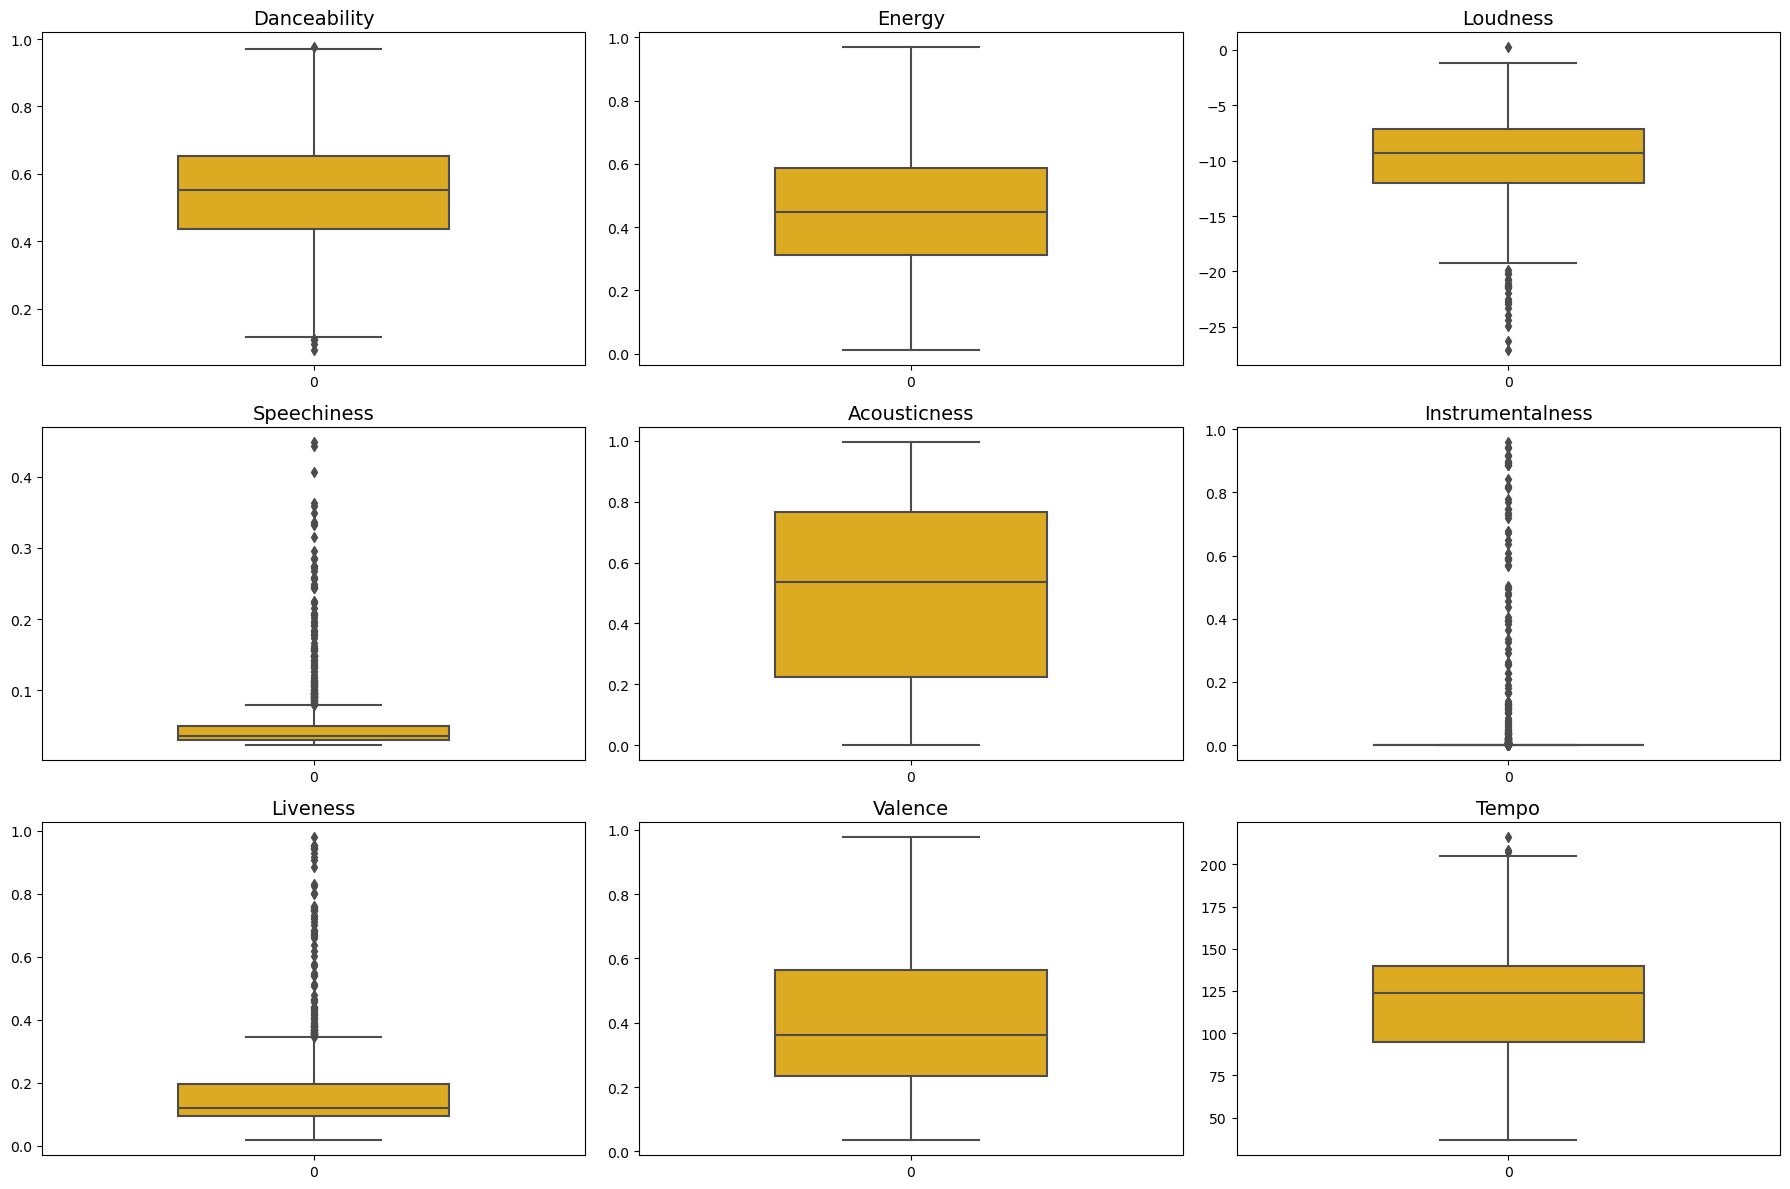

In [3]:
# What is the distribution of the audio features of songs by artists more 
# popular than Karencitta
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence',
                  'tempo']
df_features = df_tracks[audio_features]

# Create a single figure with 9 subplots (one for each audio feature)
plt.figure(figsize=(18, 12))

for i, feature in enumerate(audio_features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_tracks[feature], color='#fcba03', width=0.5, 
                linewidth=1.5)
    plt.title(feature.title(), fontsize=14)

plt.tight_layout()
plt.show()

<center><b>Figure 5.</b> Boxplot for the selected audio features.  </center>

Based on Figure 5 above, from a more general perspective, songs by artists more popular than Karencitta have the following characteristics:
1. Songs by artists more popular than Karencitta can be distinguished in terms of acousticness, the audio feature which has the highest variability. The acousticness of the middle 50% of the songs lie within 0.22 and 0.78.
2. Most of the songs by more popular artists contain vocals (lyrics, excluding 'ooh' and 'aah').
3. When it comes to energy, the perceptual measure of intensity and activity, the tracks are not too noisy (like death metal) nor too quiet (like Bach's music).

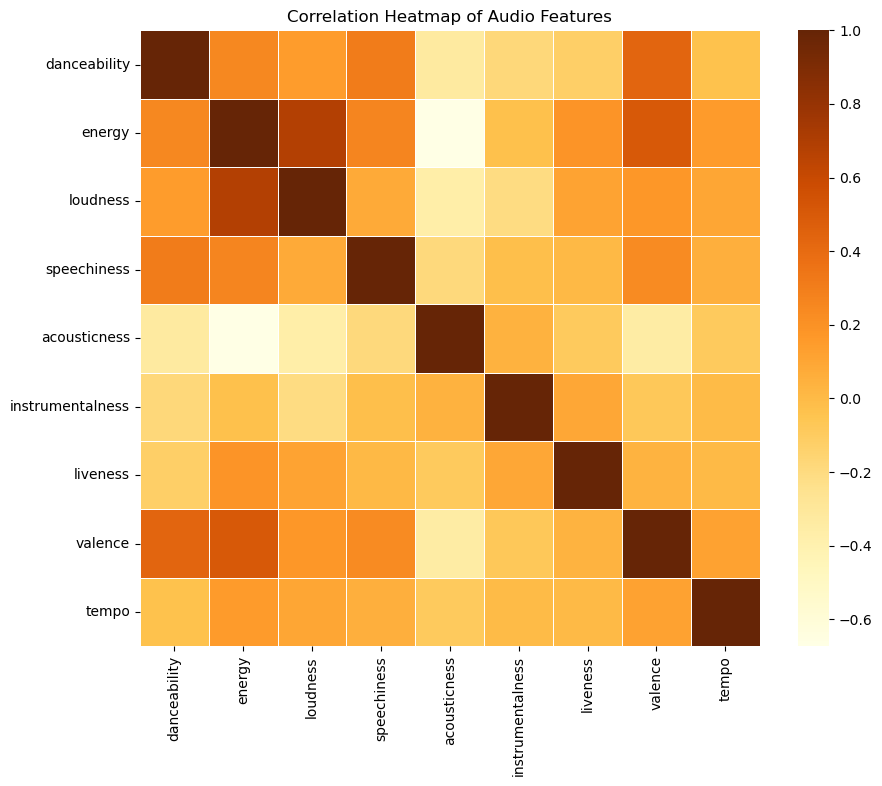

In [4]:
correlation_matrix = df_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="YlOrBr", linewidths=.5)
plt.title('Correlation Heatmap of Audio Features')
plt.show()

<center><b>Figure 6.</b> Correlation Plot of Audio Features.  </center>

The audio features of the songs have the following notable relationships based on the correlation heatmap on Figure 6 above:
1. The correlation between energy and loudness is around 0.75, indicating a strong positive correlation. As track gets louder, its energy level tends to increase as well. Consequently, the acousticness of the song is negatively correlated with the energy level and loudness.
2. Valence,the musical positiveness conveyed by a track, is moderately correlated with danceability and energy. Tracks that sound more positive (e.g. happy, cheerful, euphoric) have moderately high energy levels and are suitable for dancing.

---
Meanwhile, top ten artists who are more popular than Karencitta can be seen on the horizontal bar graph shown below in Figure 7:

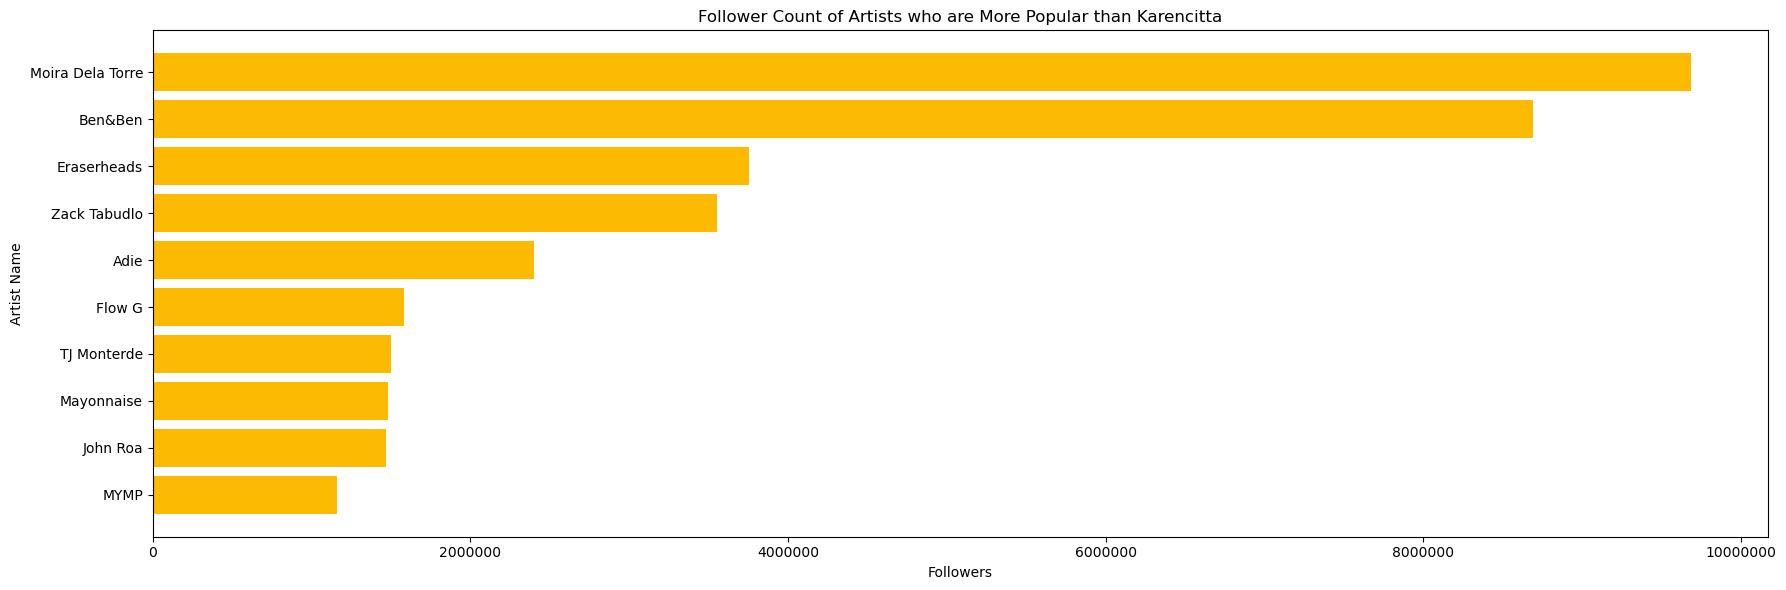

In [5]:
df_more_popular_artists = df_followers[df_followers['popularity'] > 34]
df_more_popular_artists.sort_values('followers', inplace=True, ascending=False)
top_10 = df_more_popular_artists[:10][::-1]

plt.figure(figsize=(18, 6))
plt.barh(range(len(top_10['artist_name'])), top_10['followers'], 
         color='#fcba03')
plt.ylabel('Artist Name')
plt.xlabel('Followers')
plt.title('Follower Count of Artists who are More Popular than Karencitta')
plt.yticks(range(len(top_10['artist_name'])), top_10['artist_name']
           , ha='right')
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

<center><b>Figure 7.</b> Follower Count of Artists who are more popular than Karencitta.  </center>

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black; font-family:Roboto; font-weight:bold">SIMILARITY MEASURES</h1></center>
</div>


Load the Tracks.csv for similarity analysis using only the selected features, and separating the id column in another dataframe. (See Table 3 and 4 below)

In [6]:
# Features to use
features = ['danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo']

# Load tracks dataframe
df_tracks = pd.read_csv('Tracks.csv')

# Store the IDs and audio features separately 
df_id = df_tracks['id'].copy().to_frame()
df_tracks = df_tracks[features]


In [7]:
df_tracks.head(3)

danceability  energy  loudness  speechiness  acousticness  \
0         0.709   0.867    -5.122       0.0424         0.109   
1         0.637   0.596    -6.864       0.1270         0.484   
2         0.744   0.572    -9.542       0.2680         0.152   

   instrumentalness  liveness  valence    tempo  
0          0.000611    0.1530    0.300  151.966  
1          0.000000    0.1020    0.291   74.635  
2          0.000000    0.0949    0.535  156.071

<center><b>Table 2.</b> df_tracks sample audio features. </center>

In [8]:
df_id.head(3)

id
0  6Rv8Ltr2MuAIM3LHF4L8qs
1  5hCJIUsAqjKFlvKrvCcUIb
2  6TKDFOO6Rv6VuB9PxcXQO3

<center><b>Table 3.</b> df_id sample for track IDs. </center>

In [9]:
# exemplar is seed track - Cebuana by Karencitta
exemplar = df_tracks.tail(1)
exemplar

danceability  energy  loudness  speechiness  acousticness  \
931          0.84   0.789     -7.44        0.181         0.468   

     instrumentalness  liveness  valence  tempo  
931          0.000002     0.108    0.507  98.06

<center><b>Table 4.</b> Exemplar of Seed Track - Cebuana by Karencitta </center>

Table 2 and 3 shows sample dataframes containing the audiofeature for each track and their track_id. The seed track(exemplar is shown in Table 4. 

In [10]:
# Normalization
scaler = MinMaxScaler()
df_tracks_scaled = scaler.fit_transform(df_tracks)
exemplar_scaled = scaler.transform(exemplar)

# Enter number of desired results
k = 30

# Compute Pairwise Distances for 3 types of Similarity Measure
n = len(df_tracks)
l1_dist = dist(df_tracks_scaled, exemplar_scaled, metric='l1').reshape(n,)
index_l1 = np.argsort(l1_dist)[:k]

l2_dist = dist(df_tracks_scaled, exemplar_scaled, metric='l2').reshape(n,)
index_l2 = np.argsort(l2_dist)[:k]

cos_dist = dist(df_tracks_scaled, exemplar_scaled, metric='cosine').reshape(n,)
index_cos = np.argsort(cos_dist)[:k]

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black; font-family:Roboto; font-weight:bold">PERFORMANCE ASSESSMENT</h1></center>
</div>


# Model Evaluation
---

In [11]:
# Load the labels for each song in df_tracks
songs_and_labels = pd.read_excel('Labels.xlsx')

# For each song, assign the majority rating as the final rating
songs_and_labels['final_label'] = songs_and_labels[['Label1', 'Label2',
                                                    'Label3']].mode(axis=1)

only_labels = songs_and_labels[['Label1', 'Label2', 'Label3']]
songs_and_labels = songs_and_labels[['id', 'artist', 'final_label']]

## The Fleiss' Kappa
---

In order to check the performance of the model the data has to be labeled. Three members of the team labeled the dataset **<i>independently</i>** based on their own perception of song relevance. The next step is to assess the level of agreement in the manual labeling performed.
<br>
<br>
Fleiss kappa is a quantitative measure of inter-rater agreement. This is what the team used to assess the consistency of labeling. Since the team had 3 raters, Fleiss kappa was used instead of Cohen's kappa which is applicable only for comparison between 2 sets of labels.

In [12]:
# Compute for the Fleiss' kappa
from statsmodels.stats.inter_rater import fleiss_kappa
from statsmodels.stats.inter_rater import aggregate_raters

# Convert raw data into the correct format for the `fleiss_kappa` function. 
# Shape: (subject, rater) to (subject, cat_counts)
aggregate_labels = aggregate_raters(only_labels, n_cat=None) # leiss_kappa doesn't work without this
kappa = fleiss_kappa(aggregate_labels[0]) 
print(f"Fleiss' Kappa: {kappa:.4f}")

Fleiss' Kappa: 0.8797


Based on Table 5 below, we can see that a Kappa of 0.88 corresponds to an **<i>almost perfect</i>** agreement between the sets of labels. 

<p style="text-align:center;"><img src="Kappa.png" alt="Fleiss' Kappa" width="400" height="400"></p>
<center><b>Table 5.</b> Fleiss' Kappa and Inter rater agreement interpretation</center>


## Confusion Matrix
---
Three confusion matrix were created, one for each similarity measure used: $L_{1}$-norm, $L_{2}$-norm, and Cosine similarity. The metrics of interest are precision and recall.

In [13]:
# Get the final label of each returned song across all similarity measures
k_songs_l1 = (songs_and_labels.iloc[index_l1]
              .rename(columns={'final_label': 'actual_label'}))
k_songs_l2 = (songs_and_labels.iloc[index_l2]
              .rename(columns={'final_label': 'actual_label'}))
k_songs_cos = (songs_and_labels.iloc[index_cos]
               .rename(columns={'final_label': 'actual_label'}))

# Set the predicted labels of each returned song of all similarity measures
k_songs_l1['predicted_label'] = 1
k_songs_l2['predicted_label'] = 1
k_songs_cos['predicted_label'] = 1

In [14]:
k_songs_l1.head(10)

id                       artist  actual_label  \
931  14cz01nTqAPQ9uXzIlH9qD                   Karencitta             1   
334  0GdUzbfxcfYgotqwxvEiD3                        Felip             1   
789  1Mx2fXn4utpfByX0htwf9g                      Flict G             1   
380  0w6Agoo6KSNUs5cfBhwyN3  DJ Jester The Filipino Fist             0   
38   25iZ5TJIB7Aapc9jl3dSAA                 O SIDE MAFIA             1   
859  2fumLOhI9t2YlI2KO4qEYU                       Waiian             1   
281  2u28XKcQi08FPKgS2WLcnr                        CK YG             1   
862  53vM4G43kV0zotWRRh4CpH                       Waiian             1   
778  4XGSGgKdPu18XnsC0DVki5                 Kyle Juliano             0   
33   52ctyXOm7J3niFI1T0Spul                 O SIDE MAFIA             1   

     predicted_label  
931                1  
334                1  
789                1  
380                1  
38                 1  
859                1  
281                1  
862                1  
778                1  
33                 1

<center><b>Table 6.</b> L1 Norm Distance Measure Results</center>

In [15]:
k_songs_l2.head(10)

id                       artist  actual_label  \
931  14cz01nTqAPQ9uXzIlH9qD                   Karencitta             1   
789  1Mx2fXn4utpfByX0htwf9g                      Flict G             1   
380  0w6Agoo6KSNUs5cfBhwyN3  DJ Jester The Filipino Fist             0   
334  0GdUzbfxcfYgotqwxvEiD3                        Felip             1   
862  53vM4G43kV0zotWRRh4CpH                       Waiian             1   
38   25iZ5TJIB7Aapc9jl3dSAA                 O SIDE MAFIA             1   
831  7w3RLT8BVECiAhzNHJ3fNN                       Hotdog             0   
859  2fumLOhI9t2YlI2KO4qEYU                       Waiian             1   
790  2HHnvwZpoJoxWBGicLBwRg                 Paul Michael             0   
177  3hzDFkbInoVGOZg2Qkbx7g   Filipino Music Productions             0   

     predicted_label  
931                1  
789                1  
380                1  
334                1  
862                1  
38                 1  
831                1  
859                1  
790                1  
177                1

<center><b>Table 7.</b> L2 Norm Distance Measure Results</center>

In [16]:
k_songs_cos.head(10)

id                       artist  actual_label  \
931  14cz01nTqAPQ9uXzIlH9qD                   Karencitta             1   
789  1Mx2fXn4utpfByX0htwf9g                      Flict G             1   
790  2HHnvwZpoJoxWBGicLBwRg                 Paul Michael             0   
380  0w6Agoo6KSNUs5cfBhwyN3  DJ Jester The Filipino Fist             0   
831  7w3RLT8BVECiAhzNHJ3fNN                       Hotdog             0   
1    5hCJIUsAqjKFlvKrvCcUIb                      Bosx1ne             1   
334  0GdUzbfxcfYgotqwxvEiD3                        Felip             1   
38   25iZ5TJIB7Aapc9jl3dSAA                 O SIDE MAFIA             1   
842  2Q9oTGtK3wLwhxN2qA4FR8                      Acdmnd$             1   
862  53vM4G43kV0zotWRRh4CpH                       Waiian             1   

     predicted_label  
931                1  
789                1  
790                1  
380                1  
831                1  
1                  1  
334                1  
38                 1  
842                1  
862                1

<center><b>Table 8.</b> Cosine Distance Measure Results</center>

Table 6, 7 and 8 shows the different results and measures of the similarity analysis based on seed track Cebuana.

In [17]:
# Exclude the returned songs from the pool per similarity measure
# This will be used in computing for the precision and recall
# Track IDs to exclude per similarity measure
track_ids_to_exclude_l1 = k_songs_l1['id'].tolist()
track_ids_to_exclude_l2 = k_songs_l2['id'].tolist()
track_ids_to_exclude_cos = k_songs_cos['id'].tolist()

# Remaining songs in the pool per similarity measure
songs_and_labels_left_l1 = (songs_and_labels[~songs_and_labels['id']
                                             .isin(track_ids_to_exclude_l1)])
songs_and_labels_left_l2 = (songs_and_labels[~songs_and_labels['id']
                                             .isin(track_ids_to_exclude_l2)])
songs_and_labels_left_cos = (songs_and_labels[~songs_and_labels['id']
                                              .isin(track_ids_to_exclude_cos)])

In [18]:
# Calculate the precision and recall per similarity measure
# L1
tp_l1 = len(k_songs_l1[k_songs_l1['actual_label'] == 1])
fp_l1 = len(k_songs_l1[k_songs_l1['actual_label'] == 0])
tn_l1 = len(
    songs_and_labels_left_l1[songs_and_labels_left_l1['final_label'] == 0])
fn_l1 = len(
    songs_and_labels_left_l1[songs_and_labels_left_l1['final_label'] == 1])

l1_conf_matrix = pd.DataFrame([[tp_l1, fp_l1], [fn_l1, tn_l1]],
                              columns=['Relevant', 'Irrelevant'],
                              index=['Relevant', 'Irrelevant'])

# L2
tp_l2 = len(k_songs_l2[k_songs_l2['actual_label'] == 1])
fp_l2 = len(k_songs_l2[k_songs_l2['actual_label'] == 0])
tn_l2 = len(
    songs_and_labels_left_l2[songs_and_labels_left_l2['final_label'] == 0])
fn_l2 = len(
    songs_and_labels_left_l2[songs_and_labels_left_l2['final_label'] == 1])

l2_conf_matrix = pd.DataFrame([[tp_l2, fp_l2], [fn_l2, tn_l2]],
                              columns=['Relevant', 'Irrelevant'],
                              index=['Relevant', 'Irrelevant'])

# Cosine
tp_cos = len(k_songs_cos[k_songs_cos['actual_label'] == 1])
fp_cos = len(k_songs_cos[k_songs_cos['actual_label'] == 0])
tn_cos = len(
    songs_and_labels_left_cos[songs_and_labels_left_cos['final_label'] == 0])
fn_cos = len(
    songs_and_labels_left_cos[songs_and_labels_left_cos['final_label'] == 1])

cos_conf_matrix = pd.DataFrame([[tp_cos, fp_cos], [fn_cos, tn_cos]],
                               columns=['Relevant', 'Irrelevant'],
                               index=['Relevant', 'Irrelevant'])

By using k-number of results equals 30, the confusion matrix can be generated as shown below in the Table 9, 10 and 11. It is easier to compute the Precision and Recall once we have this confusion matrix. This however, does not tell us the most robust similarity measure to use as this only shows the results for one specific k, which is 30. To better compare the performance of the three similarity measures, plotting the PR curves is necessary. 

In [19]:
l1_conf_matrix

Relevant  Irrelevant
Relevant          24           6
Irrelevant       167         735

<center><b>Table 9.</b> Confusion Matrix for IR using L1 Norm distance </center>

In [20]:
l2_conf_matrix

Relevant  Irrelevant
Relevant          21           9
Irrelevant       170         732

<center><b>Table 10.</b> Confusion Matrix for IR using L2 Norm distance </center>

In [21]:
cos_conf_matrix

Relevant  Irrelevant
Relevant          22           8
Irrelevant       169         733

<center><b>Table 11.</b> Confusion Matrix for IR using Cosine distance </center>

In [22]:
# The precision and recall of each similarity measure
precision_l1 = tp_l1 / (tp_l1+fp_l1)
precision_l2 = tp_l2 / (tp_l2+fp_l2)
precision_cos = tp_cos / (tp_cos+fp_cos)

recall_l1 = tp_l1 / (tp_l1+fn_l1)
recall_l2 = tp_l2 / (tp_l2+fn_l2)
recall_cos = tp_cos / (tp_cos+fn_cos)

pd.DataFrame({'Precision': [precision_l1,
                            precision_l2,
                            precision_cos],
              'Recall': [recall_l1,
                         recall_l2,
                         recall_cos]},
             index=['L1-Norm', 'L2-Norm', 'Cos Dist'])

Precision    Recall
L1-Norm    0.800000  0.125654
L2-Norm    0.700000  0.109948
Cos Dist   0.733333  0.115183


**L1 Model:**  
- Precision (0.80): Out of all instances predicted as positive by the L1 model, 80% are truly positive. This suggests that when the L1 model makes a positive prediction, it is relatively accurate.  
- Recall (0.13): Out of all the actual positive instances in the dataset, the L1 model identifies 13%. This indicates that the L1 model captures only a small fraction of the actual positive instances, suggesting a relatively lower recall.  

**L2 Model:**  
- Precision (0.70): The L2 model's precision is 70%, meaning that when it predicts a positive instance, 70% of the predictions are correct. It is slightly lower than the precision of the L1 model.
- Recall (0.11): The L2 model's recall is 11%, which is similar to the recall of the L1 model. This indicates that the L2 model also captures a relatively small proportion of the actual positive instances.  

**Cosine Model:**  
- Precision (0.73): The Cosine similarity model has a precision of 73%, meaning that when it predicts a positive instance, 73% of the predictions are correct. It falls between the precision values of the L1 and L2 models.  
- Recall (0.12): The recall of the Cosine model is 12%, similar to the recall values of the L1 and L2 models. It suggests that the Cosine model, like the other two, captures a relatively small proportion of the actual positive instances. 
---
**Overall Comparison:**   
The L1 model has the highest precision among the three models, indicating a higher accuracy of positive predictions.  
The recall values for all three models are relatively low, suggesting that a significant portion of actual positive instances remains undetected.  

Based on the current analysis, it is evident that L1 demonstrates superior performance. However, it is important to note that this conclusion is limited to the case when k=30. Subsequent evaluations of the precision-recall curves may either reinforce or challenge this assertion.

In [23]:
def pr_curve(query, objects, actual, all_labels, pairwise_distance_results):
    """Draw PR curve

    Parameters
    ----------
    query: array-like
        find objects similar to this query
    objects: ndarray
        database of objects to search in
    actual: int
        class label
    all_labels: array-like
        label of each object in the database
    pairwise_distance_results: array-like
        results of the pairwise distance computation calculated above

    Returns
    -------
    matplotlib.Axes
        rendered PR curve
    """
    all_labels = np.asarray(all_labels)
    results = np.argsort(pairwise_distance_results)
    rs = (all_labels[results] == actual).cumsum()
    N = (all_labels == actual).sum()
    precisions = rs / np.arange(1, len(rs) + 1)
    recalls = rs / N
    recalls = [0] + recalls.tolist()
    precisions = [1] + precisions.tolist()

    fig, ax = plt.subplots()
    ax.set_aspect("equal")
    ax.step(recalls, precisions, where="post", color='#fcba03')
    ax.fill_between(recalls, precisions, step="post", alpha=0.8, color='#fcba03')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    return ax

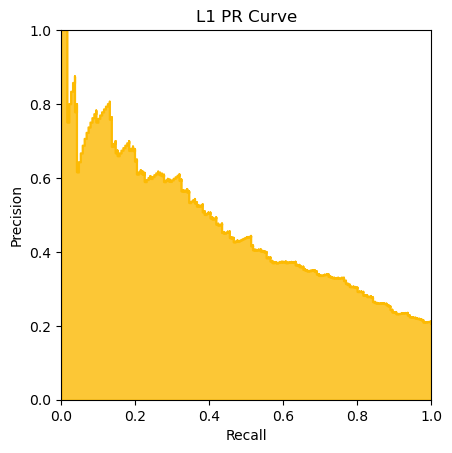

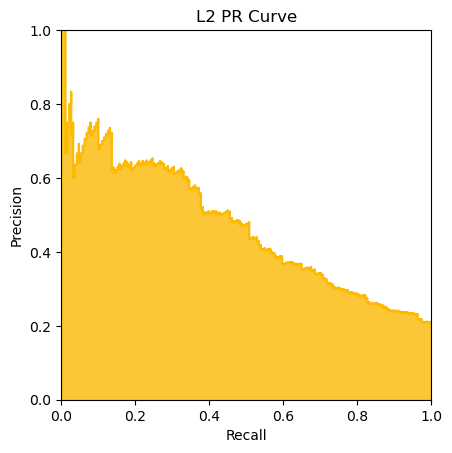

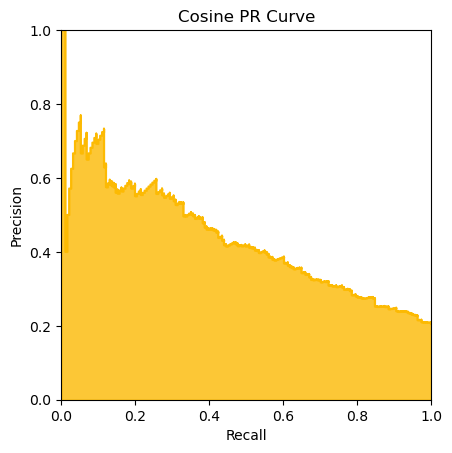

In [24]:
actual = k_songs_l1['actual_label'].values[0]
all_labels = songs_and_labels['final_label'].values

ax_l1 = pr_curve(exemplar_scaled, df_tracks_scaled, actual, all_labels, l1_dist)
ax_l1.set_title('L1 PR Curve');

ax_l2 = pr_curve(exemplar_scaled, df_tracks_scaled, actual, all_labels, l2_dist)
ax_l2.set_title('L2 PR Curve');

ax_cos = pr_curve(exemplar_scaled, df_tracks_scaled, actual, all_labels, cos_dist)
ax_cos.set_title('Cosine PR Curve');

<center><b>Figure 8.</b> PR Curves for all measures. </center>

The Precision-Recall curve provides a nuanced understanding of a model's performance at various thresholds. Different curves are showcased in Figure 8 to discern the optimal one, with a higher area under the curve indicating superior performance. The culmination of this analysis is the selection of an operating point on the curve, defined by a decision threshold. This strategic decision propels the model into practical application, embodying the assurance of optimal balance between

In [25]:
def auc_pr(query, objects, actual, all_labels, pairwise_distance_results):
    """Compute area under the PR curve

    Parameters
    ----------
    query: array-like
        find objects similar to this query
    objects: numpy.ndarray
        database of objects to search in
    actual: int
        class label
    all_labels: array-like
        label of each object in the database
    pairwise_distance_results: array-like
        results of the pairwise distance computation calculated above

    Returns
    -------
    float
        area under the PR curve
    """
    from scipy.integrate import trapz

    all_labels = np.asarray(all_labels)
    results = np.argsort(pairwise_distance_results)
    rs = (all_labels[results] == actual).cumsum()
    N = (all_labels == actual).sum()
    precisions = rs / np.arange(1, len(rs) + 1)
    recalls = rs / N
    recalls = [0] + recalls.tolist()
    precisions = [1] + precisions.tolist()
    return trapz(precisions, recalls)

In [26]:
auc_pr_l1 = auc_pr(exemplar_scaled, df_tracks_scaled, actual, all_labels, 
                   l1_dist)
auc_pr_l2 = auc_pr(exemplar_scaled, df_tracks_scaled, actual, all_labels, 
                   l2_dist)

auc_pr_cos = auc_pr(exemplar_scaled, df_tracks_scaled, actual, all_labels, 
                   cos_dist)
print(f"AUC-PR of L1: {auc_pr_l1:.6f}")
print(f"AUC-PR of L2: {auc_pr_l2:.6f}")
print(f"AUC-PR of Cosine: {auc_pr_cos:.6f}")

AUC-PR of L1: 0.468858
AUC-PR of L2: 0.467787
AUC-PR of Cosine: 0.434304


1. L1 vs L2 
 - Both L1 and L2 models exhibit very close AUC-PR scores, differing by only 0.001. This marginal difference suggests that, in the precision-recall space, the two models perform similarly. The proximity of their scores indicates a comparable ability to trade off precision and recall in the classification task.
2. L1 vs. Cosine
 - L1 outperforms the Cosine similarity measure by a marginal difference of 0.034 in terms of AUC-PR. This suggests that, based on precision and recall considerations, the L1 model is slightly more effective than the Cosine similarity measure in the given classification scenario.
3. L2 vs. Cosine
 - Similar to the comparison with L1, L2 also outperforms the Cosine similarity measure, but with a slightly smaller difference of 0.031 in AUC-PR. This indicates that the L2 model has a slight edge over the Cosine similarity measure in terms of precision and recall.
 
In summary, while the differences in AUC-PR scores are relatively small, these results imply nuanced distinctions in the precision-recall trade-offs among the models. The detailed examination of these scores helps in understanding subtle variations in their performance, with L1 and L2 exhibiting similar effectiveness and both surpassing the Cosine similarity measure in the considered classification task.

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black; font-family:Roboto; font-weight:bold">RESULTS AND DISCUSSION</h1></center>
</div>


Now that we know the appropriate similarity measure to use, next step is to determine which artist is best suited for Karencitta. 

For a successful collaboration, the team decided to use the artists popularity index and their number of followers. Karencitta's popularity index is 34 and her number of followers is 136696. (See Table 9)

   

In [27]:
df_karencitta = pd.read_csv('followers_karencita.csv')
df_karencitta

followers artist_name  popularity           id_for_artist
0     136696  Karencitta          34  0touaoSr4QOLYxBJ9lmGgK

<center><b>Table 9.</b> Karencitta followers and popularity index </center>

In [28]:
recom_artist = k_songs_l1.head(10)['artist'].tolist()

In [29]:
df_followers = pd.read_csv('Artists_info.csv')
filtered_df = df_followers[df_followers['artist_name'].isin(recom_artist)]

In [30]:
filtered_df[filtered_df['popularity'] > 34].sort_values('popularity', ascending=False)


followers   artist_name  popularity           id_for_artist
80      362464  O SIDE MAFIA          61  4O19i2jHEjPyz17BeiwbDp
15      105049         CK YG          59  57yOAX6apIrclpBG736Uy2
26      122622         Felip          48  2tEFDBihLXytoPl4xdResl
113     115075        Waiian          44  3p5RE0gW2l4oFW82SgMv29
42       24838       Flict G          39  4K7jEoIMJx2MpmgivAbJsS
68      237535  Kyle Juliano          38  7aD2Ni3fUu66gklUFlvJi5

<center><b>Table 10.</b> Artists filtered with Popularity greater than Karencitta's Popularity of 34</center>

In [31]:
filtered_df[filtered_df['followers'] > 136696].sort_values('popularity', ascending=False)

followers   artist_name  popularity           id_for_artist
80     362464  O SIDE MAFIA          61  4O19i2jHEjPyz17BeiwbDp
68     237535  Kyle Juliano          38  7aD2Ni3fUu66gklUFlvJi5

<center><b>Table 11.</b> Artists filtered with followers greater than Karencitta's followers of 136,696</center>

Based on Tables 10 and 11, the most promising collaborator is **O SIDE MAFIA**. (See Figure 9 for Spotify Profile of O SIDE MAFIA)

--------

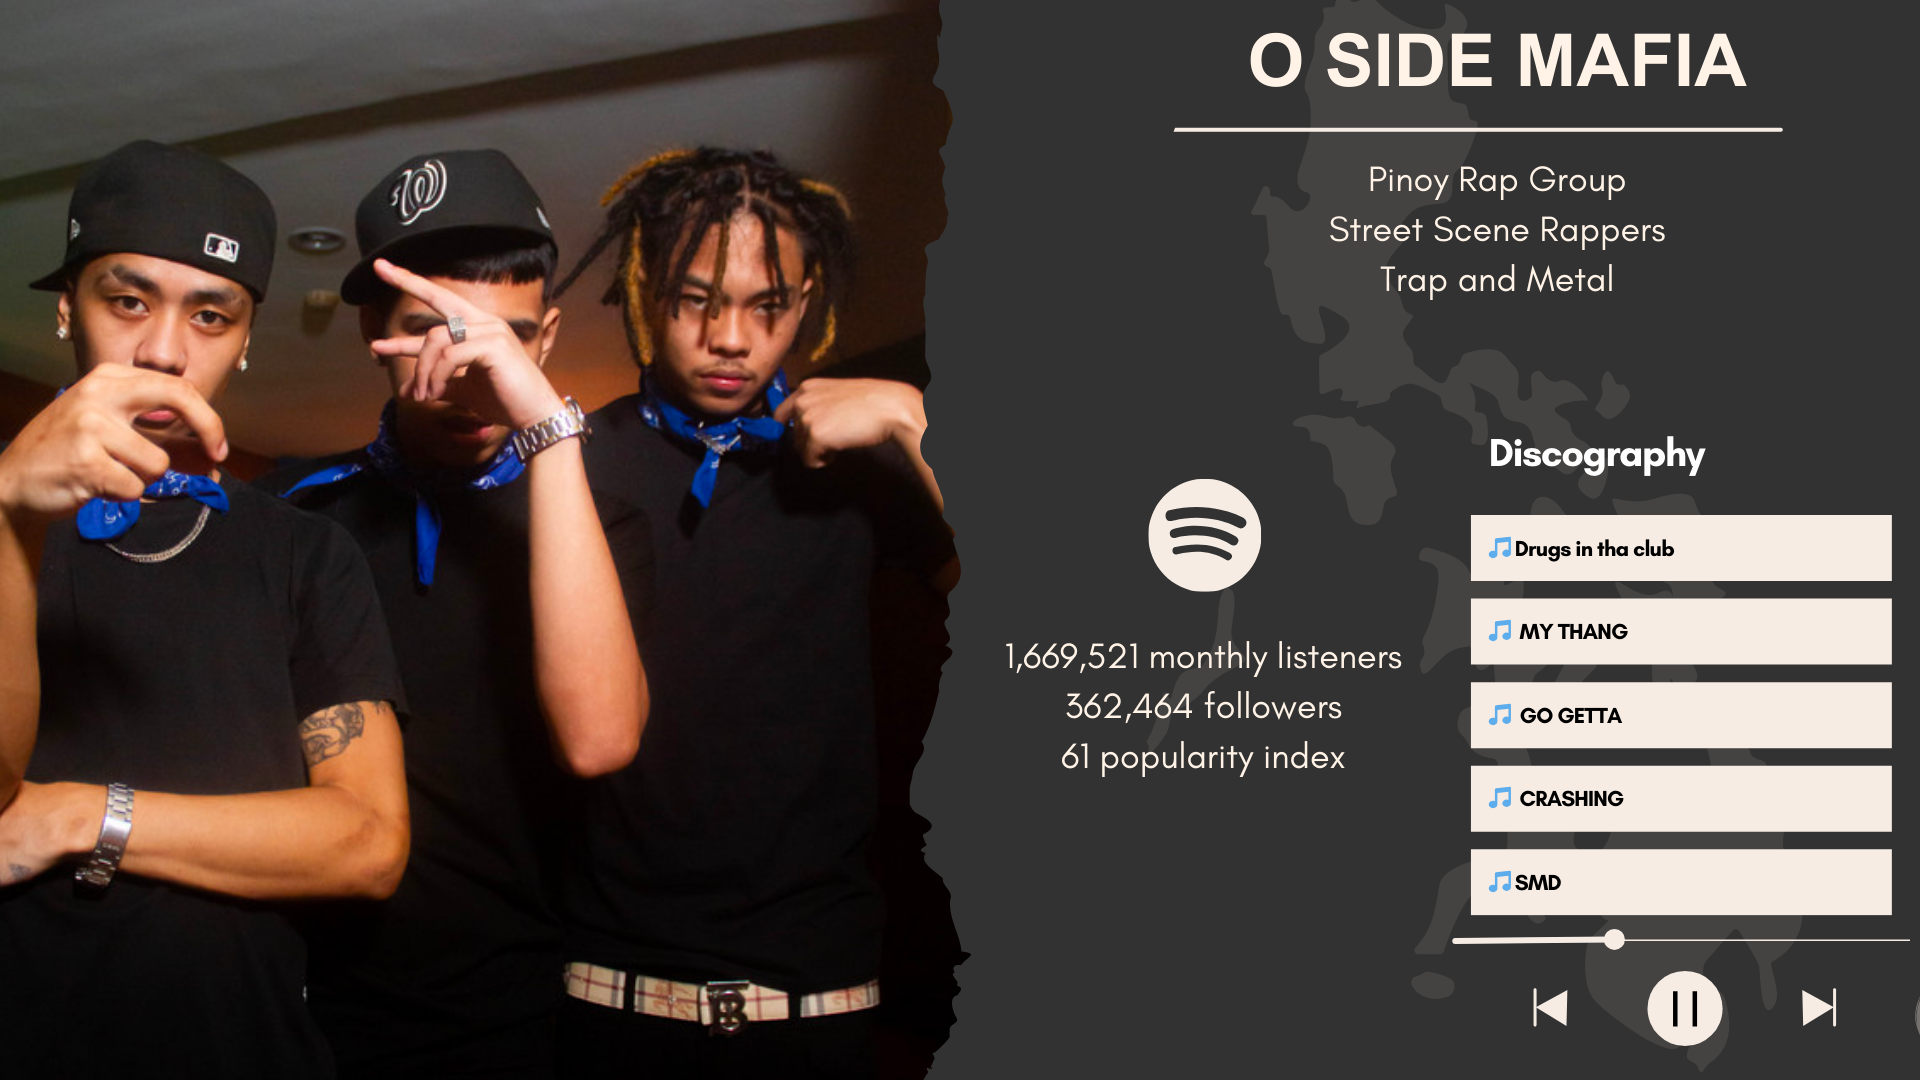
<center><b>Figure 9.</b> Spotify Profile of O SIDE MAFIA </center>

# O Side Mafia's Novelty in Angst-Infused Soundscapes: A Potent Catalyst for Elevating Karencitta's Musical Horizon
 
The emergence of O Side Mafia during the peak of the 2020 pandemic served as a vital cultural phenomenon, providing an essential avenue for expression to youth confined by stringent lockdowns and grappling with the uncertainties of a global health crisis. Originating from their neighborhood street, O Side Mafia initially honed their craft in a modest home studio, where they experimented with diverse musical styles, ranging from Bay Area influences to the distinctive "KINIKILOCS" flavor. However, it was approximately two years ago that they found resonance in an angsty musical ambiance, capturing the collective frustration of the pandemic through tracks such as "Tokyo Drift," marked by ominous bells, resonant basslines, and gritty vocal delivery. This evolution into a unique trap metal style, reminiscent of New York's City Morgue, mirrored the extended period of societal tension beyond the lockdowns.
 
Significantly, O Side Mafia's performances often spill onto the streets, drawing local residents eager for a free show and an opportunity to liberate themselves. Cashman notes the tacit approval of local government barangay councils, acknowledging the positive influence the events bring to the community. This cultural phenomenon transcends geographic boundaries, attracting attendees from diverse cities across the Metro area.
 
The collaboration between O Side Mafia and Karencitta holds significant promise for Karencitta's upcoming projects. O Side Mafia's unique trap metal style, featuring gritty vocal delivery and resonant basslines, offers a fresh and dynamic energy that can elevate Karencitta's music. This fusion, marrying O Side Mafia's innovative soundscapes with Karencitta's proven ability to craft infectious hits, creates a powerful synergy.
 
By integrating O Side Mafia's distinctive musical offerings, Karencitta can imbue her next song with a unique flavor, setting it apart in the competitive music landscape. The collaboration is poised to capture a broader audience, leveraging O Side Mafia's dedicated following alongside Karencitta's widespread appeal. This strategic alliance has the potential to propel Karencitta's next song to new heights of success, both in chart performance and cultural impact, promising not just artistic enrichment but the creation of a globally resonant musical narrative.

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black;font-family:Roboto; font-weight:bold">RECOMMENDATIONS</h1></center>
</div>


# Recommendations Related to the Pre-processing Pipeline
## Explore other APIs
The Spotify API only gave around 940 songs that we could use as basis for finding songs that are similar to Karencitta's Cebuana. We suggest exploring other APIs, such as `last.fm`, to gather a larger pool of songs for analysis. This would enhance the comprehensiveness of the study by providing a more diverse dataset for comparison.
 
## Diversity Similarity Measures
While the study utilized $L_{1}$ norm, $L_{2}$ norm, and cosine distance, future researchers are encouraged to explore alternative similarity measures like Mahalanobis distance, Jaccard distance, and Hamming distance. Each measure offers unique insights, and their inclusion may contribute to a more nuanced understanding of song similarity. However, it's essential to consider the computational complexity and appropriateness of these measures for the specific dataset.
 
---
# Recommendations Related to the Narrative
## Playlist Generation and Evaluation
Future studies can consider generating playlists based on songs similar to Cebuana and evaluating the quality and appropriateness of these playlists using unconstrained methodologies, such as user feedback, to acquire valuable insights into the user experience. This external validation ensures a more user-centric and meaningful evaluation.
 
## Extended Time Frame
We also suggest expanding the time frame of the study to analyze the notable changes in audio characteristics over time within an artist's discography, leading to a better understanding of their musical journey.
 
## Feasibilty of International Collaboration
Further studies would also benefit from expanding the scope of potential collaborators beyond regional borders. It would be interesting to find out foreign artists who share the same musical characteristics with a Filipino artist. Exploring collaborations with foreign artists not only broadens the demographic reach but also presents opportunities for cross-cultural musical fusion. This can be a strategic way for Filipino artists to increase their global visibility and audience diversity.

<div style="background-color: #fdfd96; padding: 10px 0;">
    <center><h1 style="color: black;font-family:Roboto; font-weight:bold">REFERENCES</h1></center>
</div>


Sreedhara, V. S. M., & Mocko, G. (2015). Control of thermoforming process parameters to increase quality of surfaces using pin-based tooling. https://doi.org/10.1115/DETC2015-47682 



Spotify. (n.d.). Web API. Spotify for Developers. Retrieved November 24, 2023, from https://developer.spotify.com/documentation/web-api/ 



Spotify. (n.d.). Get Track's Audio Features. Spotify for Developers. Retrieved November 24, 2023, from https://developer.spotify.com/documentation/web-api/reference/get-audio-features 



Steyels, M. (2023, May 10). O Side Mafia, Filipino rappers. Blaqlyte. Retrieved November 24, 2023, from https://blaqlyte.com/2023/05/10/o-side-mafia-filipino-rap 
